In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Courtesy of https://www.kaggle.com/mhdzahier/travel-insurance
df = pd.read_csv('data/travel insurance.csv')

In [26]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [27]:
df.shape

(63326, 11)

In [3]:
from data_cleaning import load_travel_insurance

In [28]:
X, y = load_travel_insurance()

In [29]:
X

,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online,Gender_F,Gender_M,Gender_Unknown
0,186,-29.00,9.57,81,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
1,186,-29.00,9.57,71,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
2,65,-49.50,29.70,32,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
3,60,-39.60,23.76,32,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,79,-19.80,11.88,41,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
5,66,-121.00,42.35,44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0
6,47,-39.60,23.76,32,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
7,63,-108.90,65.34,29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
8,57,-19.80,11.88,44,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
9,186,-99.00,59.40,37,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [32]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)
score = clf.score(X, y)
print(f"Accuracy: {score:.2%}")

Accuracy: 98.53%


In [43]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y)

clf.fit(train_x, train_y)
score = clf.score(test_x, test_y)
print(f"Accuracy: {score:.2%}")

Accuracy: 98.53%


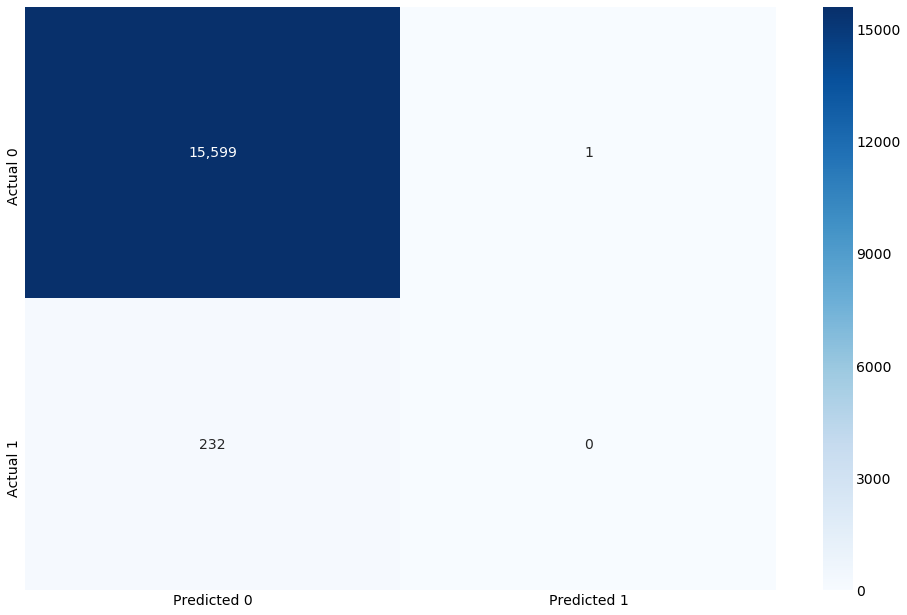

In [118]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(clf, test_x, test_y):
    pred = clf.predict(test_x)

    cm = pd.DataFrame(data=confusion_matrix(test_y, pred), 
                 index=['Actual 0', 'Actual 1'], 
                 columns=['Predicted 0', 'Predicted 1'])

    sns.heatmap(cm, cmap='Blues', annot=True, fmt=',')
    
plot_confusion_matrix(clf, test_x, test_y)

In [63]:
pd.Series(pred).value_counts()

0    15831
1        1
dtype: int64

In [62]:
print(f"Proportion of Claims: {y.mean():.2%} Non-claims: {1 - y.mean():.2%}")

Proportion of Claims: 1.46% Non-claims: 98.54%


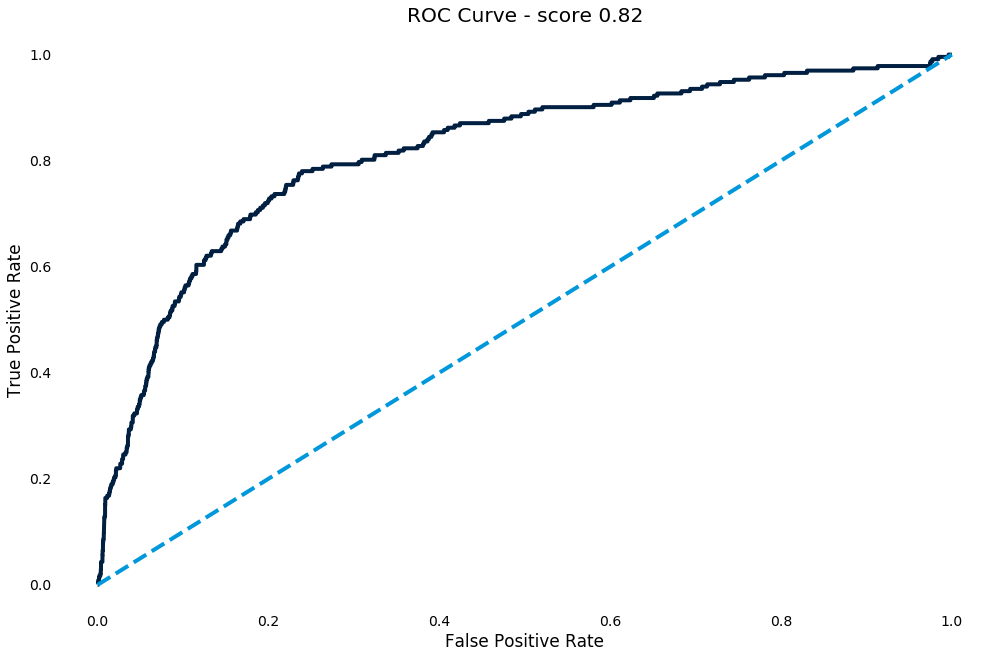

In [111]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(clf, test_x, test_y):
    pred_proba = clf.predict_proba(test_x)[:, 1] # Gives probability per label - we want the second class

    score = roc_auc_score(test_y, pred_proba)

    fpr, tpr, _ = roc_curve(test_y, pred_proba, pos_label=1)

    plt.plot(fpr, tpr)
    plt.plot([0, 1], '--')
    plt.title(f'ROC Curve - score {score:.2f}');
    plt.ylabel('True Positive Rate');
    plt.xlabel('False Positive Rate');
    
plot_roc_curve(clf, test_x, test_y)

In [116]:
from sklearn.metrics import f1_score, precision_score, recall_score
pred = clf.predict(test_x)
f1 = f1_score(test_y, pred)
precision = precision_score(test_y, pred)
recall = recall_score(test_y, pred)

print(f"F1 score: {f1}, Precision: {precision}, Recall: {recall}")

F1 score: 0.0, Precision: 0.0, Recall: 0.0


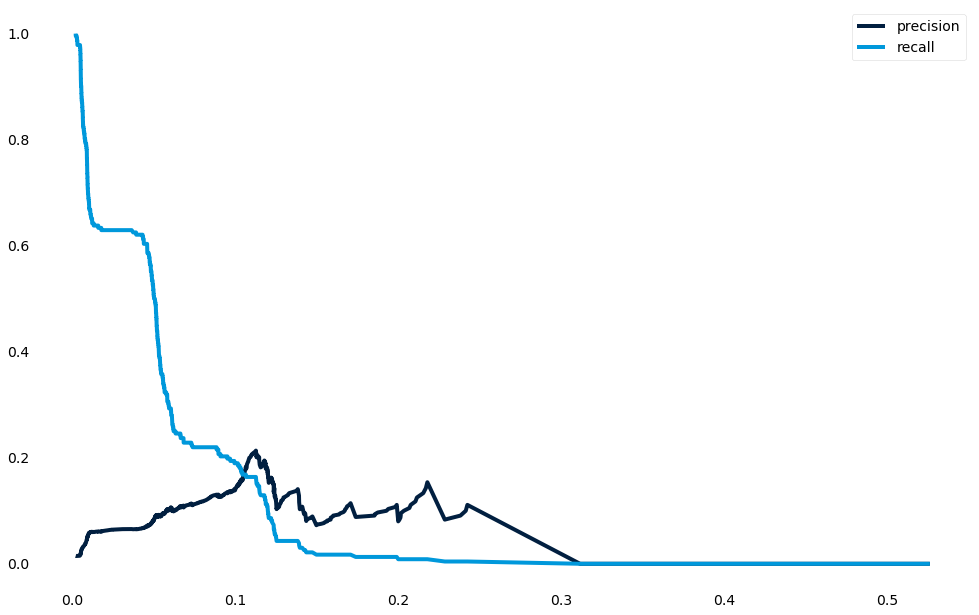

In [94]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(test_y, clf.predict_proba(test_x)[:, 1])

plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [122]:
# %load livecode_snippets/all_the_models.py
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from collections import defaultdict

models = [LogisticRegression(), GradientBoostingClassifier(), GaussianNB(), RandomForestClassifier(), DummyClassifier()]

results = defaultdict(dict)
for model in models:
    model_name = model.__class__.__name__ # Get the model name
    model.fit(train_x, train_y)
    pred_proba = model.predict_proba(test_x)[:, 1]
    pred = model.predict(test_x)
    results[model_name]['roc_auc'] = roc_auc_score(test_y, pred_proba)
pd.DataFrame(results).T.sort_values(by='roc_auc', ascending=False)

,roc_auc
GradientBoostingClassifier,0.831589
LogisticRegression,0.817515
GaussianNB,0.795327
RandomForestClassifier,0.597873
DummyClassifier,0.499350


In [108]:
rf2 = GradientBoostingClassifier(max_depth=10)

rf2.fit(train_x, train_y)

pred_proba = rf2.predict_proba(test_x)[:, 1]
roc_auc_score(test_y, pred_proba)

0.7557693689213085

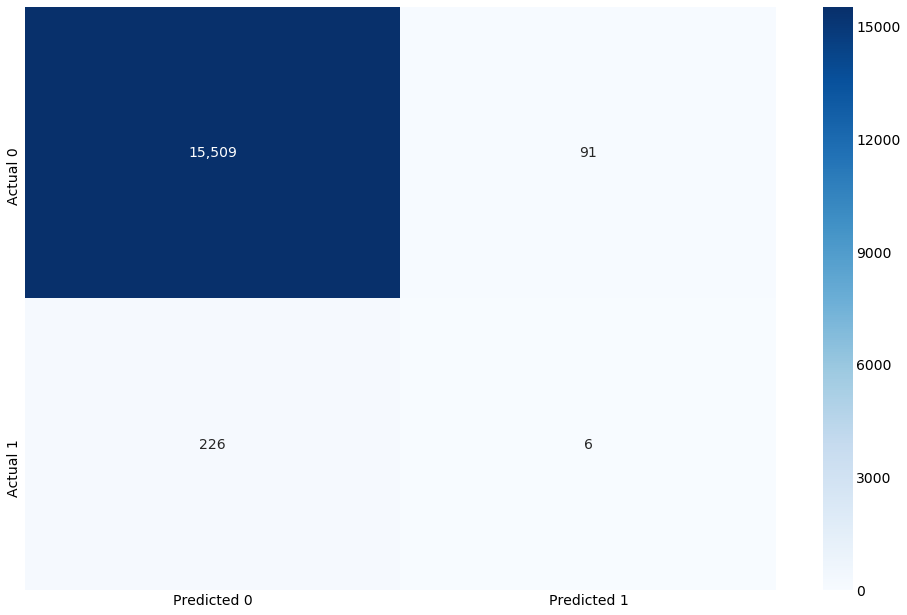

In [123]:
plot_confusion_matrix(rf2, test_x, test_y)

In [101]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 4, 6, 8]}

grid = GridSearchCV(RandomForestClassifier(n_estimators=100), param_grid=param_grid, n_jobs=-1, verbose=1, scoring='roc_auc')

grid.fit(train_x, train_y)

print(f"Best score: {grid.best_score_:.3f}")
print(f"Best params: {grid.best_params_}")
pd.DataFrame(grid.cv_results_).sort_values(by='mean_test_score', ascending=False)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   28.4s finished


Best score: 0.805
Best params: {'max_depth': 5, 'min_samples_split': 2}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.468231,0.041988,0.207282,0.013466,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.799151,0.798016,0.818813,0.805326,0.009548,1,0.839979,0.841514,0.829940,0.837144,0.005133
6,2.363928,0.029637,0.246547,0.004706,10,6,"{'max_depth': 10, 'min_samples_split': 6}",0.796688,0.799895,0.818949,0.805177,0.009825,2,0.937959,0.947275,0.940185,0.941806,0.003972
1,1.493434,0.021201,0.190113,0.007727,5,4,"{'max_depth': 5, 'min_samples_split': 4}",0.798139,0.799887,0.815337,0.804454,0.007728,3,0.840261,0.844416,0.827358,0.837345,0.007263
5,2.341775,0.033932,0.248162,0.002559,10,4,"{'max_depth': 10, 'min_samples_split': 4}",0.791332,0.798824,0.818816,0.802990,0.011601,4,0.943520,0.948341,0.944104,0.945322,0.002148
2,1.486003,0.003429,0.183852,0.000923,5,6,"{'max_depth': 5, 'min_samples_split': 6}",0.800464,0.796030,0.812338,0.802944,0.006884,5,0.845819,0.840947,0.826565,0.837777,0.008173
3,1.475146,0.026260,0.182951,0.001336,5,8,"{'max_depth': 5, 'min_samples_split': 8}",0.797826,0.794934,0.815036,0.802598,0.008873,6,0.842125,0.836686,0.830096,0.836302,0.004918
7,2.349643,0.018088,0.243703,0.001154,10,8,"{'max_depth': 10, 'min_samples_split': 8}",0.779715,0.798900,0.821966,0.800193,0.017273,7,0.936414,0.938149,0.935990,0.936851,0.000934
4,2.358175,0.011046,0.252006,0.001905,10,2,"{'max_depth': 10, 'min_samples_split': 2}",0.788555,0.793328,0.810899,0.797594,0.009607,8,0.941138,0.947184,0.948733,0.945685,0.003277
11,3.030665,0.198557,0.295190,0.004597,15,8,"{'max_depth': 15, 'min_samples_split': 8}",0.762843,0.780445,0.797172,0.780153,0.014016,9,0.986076,0.987573,0.985377,0.986342,0.000916
10,2.853940,0.085148,0.300039,0.006883,15,6,"{'max_depth': 15, 'min_samples_split': 6}",0.767182,0.766958,0.792091,0.775410,0.011795,10,0.988827,0.988371,0.989536,0.988911,0.000479


In [98]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=3)

example_X = X.head(20)
example_y = y.head(20)

for i, (train_idx, test_idx) in enumerate(cv.split(example_X, example_y), start=1):
    print(f"Split nr: {i}")
    print('='*79)
    print("Train ids:")
    print(f"n: {len(train_idx)}")
    print(train_idx)
    print('-'*79)
    print(example_X.loc[train_idx, :'Age'])
    print()
    print("Test ids:")
    print(f"n: {len(test_idx)}")
    print(test_idx)
    print('-'*79)
    print(example_X.loc[test_idx, :'Age'])
    print()

Split nr: 1
Train ids:
n: 13
[ 7  8  9 10 11 12 13 14 15 16 17 18 19]
-------------------------------------------------------------------------------
    Duration  Net Sales  Commision (in value)  Age
7         63     -108.9                 65.34   29
8         57      -19.8                 11.88   44
9        186      -99.0                 59.40   37
10        33      -26.0                  9.10  118
11         1      -18.0                  6.30   47
12        53     -130.0                 49.40   48
13         5      -39.6                 23.76   64
14        39      -25.0                  0.00   36
15         6      -19.8                 11.88   53
16        48      -79.2                 47.52   43
17        11      -29.7                 17.82   58
18         3      -18.0                  6.30   47
19        14      -69.3                 41.58   37

Test ids:
n: 7
[0 1 2 3 4 5 6]
-------------------------------------------------------------------------------
   Duration  Net Sales  

In [99]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10)
model = RandomForestClassifier(n_estimators=1000, max_depth=5)
scores = []
for train_idx, test_idx in cv.split(X, y):
    train_split_X, train_split_y = X.values[train_idx], y.values[train_idx]
    test_split_X, test_split_y = X.values[test_idx], y.values[test_idx]
    
    model.fit(train_split_X, train_split_y)
    predict_proba = model.predict_proba(test_split_X)[:, 1]
    roc_score = roc_auc_score(test_split_y, predict_proba)
    print(f"Score: {roc_score:.2f}")
    scores.append(roc_score)
print(f"Average: {np.mean(scores):.2f} Std: {np.std(scores):.2f}")

Score: 0.78
Score: 0.81
Score: 0.83
Score: 0.86
Score: 0.78
Score: 0.77
Score: 0.85
Score: 0.79
Score: 0.85
Score: 0.76
Average: 0.81 Std: 0.03


In [105]:
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(n_estimators=1000, max_depth=5)
cv = StratifiedKFold(n_splits=10)

scores = cross_val_score(model, train_x, train_y, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=1)

print(f"Average: {np.mean(scores):.2f} Std: {np.std(scores):.2f}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Average: 0.81 Std: 0.02


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.0min finished


In [104]:
scores

array([0.79745269, 0.76869353, 0.80888431, 0.79905372, 0.7879533 ,
       0.82383562, 0.81560603, 0.81582126, 0.83368481, 0.80465757])